In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

#### Exercise 1

In [143]:
l = np.random.randint(1, 100, size=1000)
s = pd.Series(l)

# datetime index starting 2016-01-01. The index should be 
# daily frequency and should be the same length as the data.
s.index = pd.date_range(start='2016-01-01', periods=len(s), freq='D')


- Print every other element of the first 50 elements of series s.
- Find the value associated with the index 2017-02-20.

In [144]:
print(s.iloc[:50:2]);
print(s.loc['2017-02-20'])

2016-01-01    87
2016-01-03    69
2016-01-05    86
2016-01-07    57
2016-01-09    24
2016-01-11    57
2016-01-13     3
2016-01-15     4
2016-01-17    42
2016-01-19    52
2016-01-21    15
2016-01-23    73
2016-01-25    59
2016-01-27    79
2016-01-29    60
2016-01-31    39
2016-02-02    18
2016-02-04    17
2016-02-06    21
2016-02-08    24
2016-02-10    11
2016-02-12    60
2016-02-14    69
2016-02-16    12
2016-02-18    47
Freq: 2D, dtype: int32
73


In [145]:
# In the series s, print all the values between 1 and 3. 
print(s.loc[(s >= 1) & (s <= 3)])

2016-01-13    3
2016-04-08    1
2016-05-18    1
2016-06-28    3
2016-07-03    1
2016-08-10    2
2016-10-05    2
2016-11-19    3
2017-03-09    1
2017-04-04    1
2017-04-19    1
2017-04-30    3
2017-06-09    3
2017-09-11    2
2017-09-28    1
2017-09-29    1
2017-10-08    3
2018-01-09    2
2018-01-22    1
2018-03-30    1
dtype: int32


#### Exercise 2

In [146]:
# Print the first and last 5 elements of the series.
print(s.head(5))
print(s.tail(5))

2016-01-01    87
2016-01-02    10
2016-01-03    69
2016-01-04     5
2016-01-05    86
Freq: D, dtype: int32
2018-09-22    82
2018-09-23    41
2018-09-24    54
2018-09-25    50
2018-09-26    18
Freq: D, dtype: int32


- Using the resample method, upsample the daily data to monthly frequency. Use the median method so that each monthly value is the median price of all the days in that month.
- Take the daily data and fill in every day, including weekends and holidays, using forward-fills.

In [147]:
prices = yf.download(tickers = ["CMG"], start = "2012-01-01", end = "2016-01-01")["Adj Close"]


[*********************100%***********************]  1 of 1 completed


In [148]:
monthly_prices = prices.resample('M').median()
monthly_prices.head(5)

Date
2012-01-31    355.505005
2012-02-29    378.195007
2012-03-31    408.994995
2012-04-30    420.835007
2012-05-31    405.240005
Freq: M, Name: Adj Close, dtype: float64

In [149]:
prices_everyday = prices.reindex(pd.date_range(start="2012-01-01", end="2016-01-01", freq='D'), method='ffill')
prices_everyday.head(10)

2012-01-01           NaN
2012-01-02           NaN
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
2012-01-08    348.950012
2012-01-09    339.739990
2012-01-10    341.119995
Freq: D, Name: Adj Close, dtype: float64

#### Exercise 3: Missing Data

- Replace all instances of NaN using the forward fill method.
- Instead of filling, remove all instances of NaN from the data.

In [150]:
prices_everyday.fillna(method='bfill')

2012-01-01    341.269989
2012-01-02    341.269989
2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
                 ...    
2015-12-28    493.519989
2015-12-29    489.940002
2015-12-30    485.790009
2015-12-31    479.850006
2016-01-01    479.850006
Freq: D, Name: Adj Close, Length: 1462, dtype: float64

In [151]:
prices_everyday.dropna()

2012-01-03    341.269989
2012-01-04    348.750000
2012-01-05    350.480011
2012-01-06    348.950012
2012-01-07    348.950012
                 ...    
2015-12-28    493.519989
2015-12-29    489.940002
2015-12-30    485.790009
2015-12-31    479.850006
2016-01-01    479.850006
Freq: D, Name: Adj Close, Length: 1460, dtype: float64

#### Exercise 4: Time Series Analysis

In [152]:
print("Summary Statistics")
print(s.describe())

Summary Statistics
count    1000.000000
mean       50.503000
std        27.485331
min         1.000000
25%        27.000000
50%        52.000000
75%        73.000000
max        99.000000
dtype: float64


- Get the additive and multiplicative returns of this series.
- Calculate the rolling mean with a 60 day window.
- Calculate the standard deviation with a 60 day window.

In [153]:
data = yf.download(tickers=['GE'], start='2016-01-01', end='2017-01-01')['Open']
data

[*********************100%***********************]  1 of 1 completed


Date
2016-01-04    183.450424
2016-01-05    184.231064
2016-01-06    181.769058
2016-01-07    178.046005
2016-01-08    175.343781
                 ...    
2016-12-23    191.376923
2016-12-27    191.497025
2016-12-28    191.196777
2016-12-29    190.596283
2016-12-30    189.935745
Name: Open, Length: 252, dtype: float64

In [154]:
add_returns = data.diff()[1:]
mult_returns = data.pct_change()[1:]

In [155]:
rolling_mean = data.rolling(60).mean()
rolling_mean

Date
2016-01-04           NaN
2016-01-05           NaN
2016-01-06           NaN
2016-01-07           NaN
2016-01-08           NaN
                 ...    
2016-12-23    181.146541
2016-12-27    181.375729
2016-12-28    181.613924
2016-12-29    181.817091
2016-12-30    182.028264
Name: Open, Length: 252, dtype: float64

In [156]:
rolling_std = data.rolling(60).std()
rolling_std

Date
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
                ...   
2016-12-23    7.224323
2016-12-27    7.331931
2016-12-28    7.415898
2016-12-29    7.493109
2016-12-30    7.541044
Name: Open, Length: 252, dtype: float64

#### Exercise 5: DataFrames

In [157]:
l = ['fifth','fourth', 'third', 'second', 'first']
dict_data = {'a' : [1, 2, 3, 4, 5], 'b' : ['L', 'K', 'J', 'M', 'Z'],'c' : np.random.normal(0, 1, 5)}

df = pd.DataFrame(dict_data, index=l)
df

,a,b,c
fifth,1,L,0.471773
fourth,2,K,-0.808770
third,3,J,-0.798876
second,4,M,0.381169
first,5,Z,0.421127


- Concatenate the following two series to form a dataframe.
- Rename the columns to Good Numbers and Bad Numbers.
- Change the index to be a datetime index starting on 2016-01-01.

In [158]:
s1 = pd.Series([2, 3, 5, 7, 11, 13], name='prime')
s2 = pd.Series([1, 4, 6, 8, 9, 10], name='other')

df_1 = pd.concat([s1, s2], axis=1)
df_1.columns = ["Good Numbers", "Bad Numbers"]
df_1.index = pd.date_range(start='2016-01-01', periods=len(df_1))

#### Exercise 6: Accessing DataFrames elements

- Check the data type of one of the DataFrame's columns.
- Print the values associated with time range 2013-01-01 to 2013-01-10.

In [159]:
symbol = ["XOM", "BP", "COP"]
start = "2012-01-01"
end = "2016-01-01"
prices = yf.download(symbol, start=start, end=end)['Adj Close']

# Check Type of Data for these two.    
prices.XOM.head()
prices.loc[:, 'XOM'].head()

[*********************100%***********************]  3 of 3 completed


Date
2012-01-03    53.588898
2012-01-04    53.601326
2012-01-05    53.439335
2012-01-06    53.040516
2012-01-09    53.277294
Name: XOM, dtype: float64

In [160]:
print(type(prices.XOM))
print(type(prices.loc[:, 'XOM']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [161]:
print(prices.loc['2013-01-01':'2013-01-10'])

                   BP        COP        XOM
Date                                       
2013-01-02  22.769684  41.145641  56.679356
2013-01-03  23.225935  41.117840  56.577122
2013-01-04  23.435268  41.576481  56.839073
2013-01-07  23.295710  41.117840  56.180973
2013-01-08  23.295710  40.561909  56.532394
2013-01-09  23.762693  40.478519  56.315140
2013-01-10  24.159908  40.652256  56.928520


#### Exercise 7: Boolean Indexing

In [162]:
# Filter the data for prices to only print out values where
# BP > 30

# XOM < 100

# BP > 30 AND XOM < 100

# The union of (BP > 30 AND XOM < 100) with TOT being non-nan

print(prices.loc[prices.BP > 30])
print(prices.loc[prices.XOM < 100])
print(prices.loc[(prices.BP > 30) & (prices.XOM < 100)])
print(prices.loc[((prices.BP > 30) & (prices.XOM < 100)) | ~prices.COP.isnull()])

                   BP        COP        XOM
Date                                       
2014-06-18  30.423717  62.259895  68.367447
2014-06-19  30.423717  62.651604  68.300903
2014-06-20  30.487247  63.087650  69.099487
2014-06-23  30.654766  63.634560  69.465546
2014-06-24  30.521908  62.673767  68.367447
2014-06-25  30.394825  63.279835  67.974823
2014-06-26  30.469921  63.531090  67.901596
2014-06-27  30.383287  63.560661  67.355865
2014-06-30  30.469921  63.361115  67.003159
2014-07-01  30.614332  63.641945  67.455704
2014-07-02  30.833838  63.457176  67.595467
2014-07-03  30.700979  63.856277  68.274284
2014-07-07  30.394825  63.634560  68.314201
2014-07-08  30.256199  63.590221  68.434013
2014-07-09  30.221544  63.412846  68.913147
2014-07-16  30.198435  64.070625  69.059578
                   BP        COP        XOM
Date                                       
2012-01-03  22.621035  37.561558  53.588898
2012-01-04  22.933653  37.384312  53.601326
2012-01-05  22.677416  37.085518

In [163]:
# Add a column for TSLA and drop the column for XOM

tesla = yf.download('TSLA', start=start, end=end)['Adj Close']
prices.loc[:, 'TSLA'] = tesla
prices = prices.drop('XOM', axis=1)

[*********************100%***********************]  1 of 1 completed


- Concatenate these DataFrames.
- Fill the missing data with 0s

In [164]:
# Concatenate these dataframes
df_1 = yf.download(['SPY', 'VXX'], start=start, end=end)['Adj Close']
df_2 = yf.download(['MSFT', 'AAPL', 'GOOG'], start=start, end=end)['Adj Close']

concat_df = pd.concat([df_1, df_2], axis=1)

[*********************100%***********************]  2 of 2 completed


1 Failed download:
['VXX']: Exception("%ticker%: Data doesn't exist for startDate = 1325394000, endDate = 1451624400")



[*********************100%***********************]  3 of 3 completed


In [165]:
# Fill GOOG missing data with 0

concat_df.GOOG.fillna(0, inplace=True)

#### Exercise 8: Time Series Analysis

- Print out a summary of the prices DataFrame from above.
- Take the log returns and print the first 10 values.
- Print the multiplicative returns of each company.
- Normalize and plot the returns from 2014 to 2015.
- Plot a 60 day window rolling mean of the prices.
- Plot a 60 day window rolling standfard deviation of the prices.

In [166]:
# Print a summary of the 'prices' times series.
print(prices.describe())

                BP          COP         TSLA
count  1006.000000  1006.000000  1006.000000
mean     24.011132    45.989242     9.831080
std       2.598629     7.413656     5.978479
min      18.235071    32.902836     1.519333
25%      22.311869    39.461544     2.339000
50%      23.567366    45.398788    11.876667
75%      25.738363    51.018872    15.140499
max      30.833838    64.666893    19.069332


In [171]:
# Print the natural log returns of the first 10 values
np.log(prices)

,BP,COP,TSLA
Date,,,
2012-01-03,3.118880,3.625981,0.627007
2012-01-04,3.132605,3.621251,0.613743
2012-01-05,3.121370,3.613227,0.592221
2012-01-06,3.117520,3.605413,0.584448
2012-01-09,3.117293,3.609259,0.597003
...,...,...,...
2015-12-24,3.008759,3.648226,2.732504
2015-12-28,2.995912,3.618991,2.725453
2015-12-29,3.000945,3.631206,2.760811


In [168]:
# Print the Muliplicative returns 
print(prices.pct_change()[1:])

                  BP       COP      TSLA
Date                                    
2012-01-04  0.013820 -0.004719 -0.013177
2012-01-05 -0.011173 -0.007992 -0.021292
2012-01-06 -0.003842 -0.007783 -0.007743
2012-01-09 -0.000227  0.003854  0.012635
2012-01-10  0.007261  0.004661  0.013578
...              ...       ...       ...
2015-12-24 -0.007110 -0.008974  0.003788
2015-12-28 -0.012765 -0.028813 -0.007026
2015-12-29  0.005046  0.012291  0.035990
2015-12-30 -0.017571 -0.024492  0.003794
2015-12-31 -0.001597  0.001932  0.008064

[1005 rows x 3 columns]


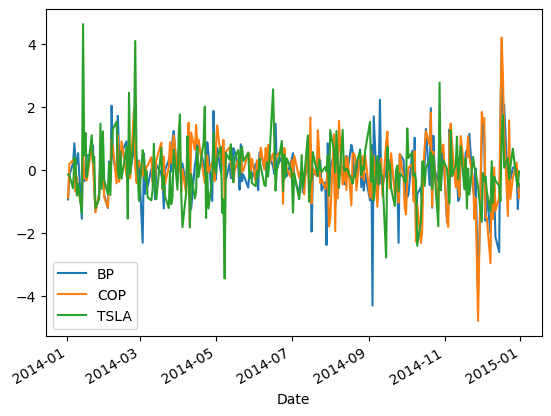

In [169]:
# Normlalize the returns and plot 
mu_returns = prices.pct_change()[1:]
norm_returns = (mu_returns - mu_returns.mean(axis=0))/mu_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

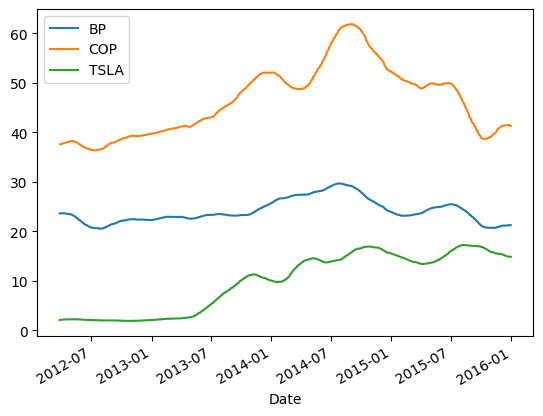

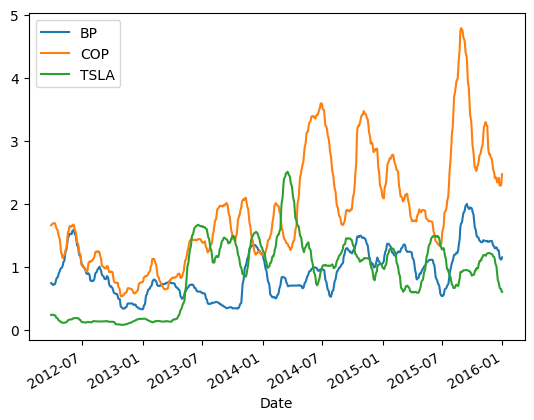

In [170]:
# Rolling mean
roll_means = prices.rolling(60).mean()

# Rolling standard deviation
roll_std = prices.rolling(60).std()

# Plotting 
roll_means.plot()
roll_std.plot();